In [1]:
import numpy as np
import pandas as pd
from io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz
from sklearn import tree
import subprocess
from ipywidgets import interact, IntSlider, fixed, FloatSlider, Dropdown
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('air_traffic_data.csv')
y=df['GEO Summary']
keys={'Domestic': 0, 'International': 1}
y=y.map(lambda x: keys[x])
df=df.drop(['GEO Summary','Published Airline','Published Airline IATA Code','Activity Period','Passenger Count','Operating Airline IATA Code'], axis=1)
df=df.drop(['GEO Region'], axis=1) ##Этот стоблец даёт данным методам идеальное разбиение!
for i in df.columns:
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(df[i])
    df[i]=label_encoder.transform(df[i])
df

,Operating Airline,Activity Type Code,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,0,0,2,1,0,8530,0,5
1,0,1,0,2,1,1,8617,0,5
2,0,2,0,2,1,2,5527,0,5
3,4,0,1,2,1,0,8883,0,5
4,4,1,1,2,1,1,8824,0,5
...,...,...,...,...,...,...,...,...,...
15002,71,1,0,3,3,1,11376,11,7
15003,71,0,0,0,0,0,1762,11,7
15004,71,1,0,3,3,1,2039,11,7
15005,72,0,1,0,0,0,6091,11,7


In [3]:
x_train, x_test, y_train, y_test=train_test_split(df, y, test_size=0.15)

In [7]:
def tree_model(criterion, max_depth, min_samples_leaf, random_state):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))
    ax[1].scatter(x_train.iloc[:,0], x_train.iloc[:, 7], c=y_train)
    ax[1].set_xlabel('$x_1$')
    ax[1].set_ylabel('$x_2$')
    tree1 = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=random_state)
    tree1 = tree1.fit(x_train, y_train)
    tree_pred = tree1.predict(x_test)
    dot_data = StringIO()  
    tree1.convert_to_graphviz(tree1, out_file=dot_data, filled=True, rounded=True, special_characters=True)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    ax[0].imshow(graph[0].create_png())
    with open('tree.dot', 'w') as fout:
        export_graphviz(tree, out_file=fout, feature_names=['x1', 'x2','x3','x4','x5','x6','x7','x8','x9'], class_names=['0', '1'])
    command = ["dot", "-Tpng", "tree.dot", "-o", "tree.png"]
    subprocess.check_call(command)
    ax[0].imshow(plt.imread('tree.png'))
    ax[0].axis("off")
    plt.show()
    for i in precision_recall_fscore_support(y_test, tree_pred):
      print(i[0], i[1])

interactive(children=(Dropdown(description='criterion', index=1, options=('gini', 'entropy'), value='entropy')…

<function __main__.tree_model(criterion, max_depth, min_samples_leaf, random_state)>

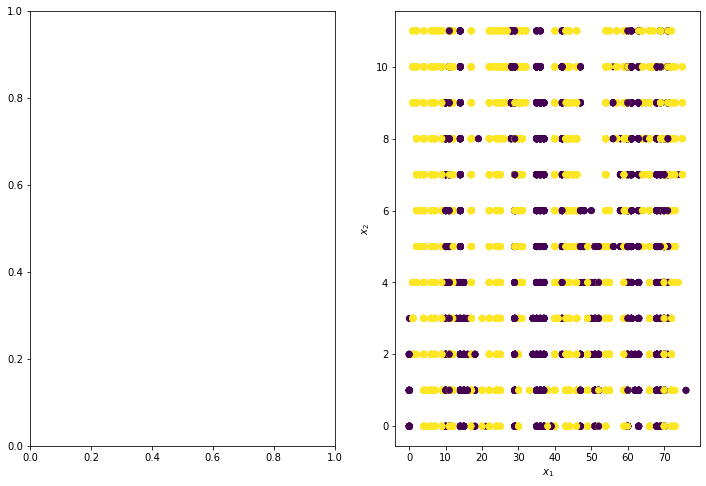

In [8]:
interact(tree_model, 
             criterion=Dropdown(options=["gini", "entropy"], value="entropy"),
             max_depth=IntSlider(min=1, max=10, value=3),
             min_samples_leaf=IntSlider(min=1, max=10, value=1),
             random_state=IntSlider(min=100, max=1000, value=300, step=10),
)

In [6]:
forest=RandomForestClassifier()
forest.fit(x_train, y_train)
y_hat2=forest.predict(x_test)
for i in precision_recall_fscore_support(y_test, y_hat2):
      print(i[0], i[1])

0.9824970828471412 0.9777777777777777
0.9644902634593356 0.9891225525743292
0.9734104046242774 0.9834174477289113
873 1379
